<a href="https://colab.research.google.com/github/tmdcks1103/Machine-Learning-Programming/blob/main/9%EC%A3%BC%EC%B0%A8/RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# train test 데이터 나누는 부분 누락 (8:2 분할)
# MSE도 구하기

import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/9주차/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

df

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [7]:
# 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

data

array([[0.03431412],
       [0.03423395],
       [0.07784815],
       [0.12290548],
       [0.09540608],
       [0.12009941],
       [0.1150485 ],
       [0.08867153],
       [0.08778963],
       [0.09845266],
       [0.09692937],
       [0.1527299 ],
       [0.        ],
       [0.01843983],
       [0.09051551],
       [0.10791309],
       [0.10230097],
       [0.13348833],
       [0.11440712],
       [0.11432695],
       [0.10687084],
       [0.09660867],
       [0.11777439],
       [0.15577648],
       [0.00352762],
       [0.02773992],
       [0.11320452],
       [0.098613  ],
       [0.11456747],
       [0.15665838],
       [0.10366391],
       [0.13533232],
       [0.10767257],
       [0.09757075],
       [0.14054357],
       [0.15553596],
       [0.02717871],
       [0.03631845],
       [0.09925439],
       [0.07720677],
       [0.13501163],
       [0.15577648],
       [0.09556642],
       [0.15786098],
       [0.0965285 ],
       [0.12210374],
       [0.14591518],
       [0.143

In [9]:
# 시퀀스 생성
window = 12
X, Y = [], []

for i in range(len(data) - window):
  X.append(data[i:i+window])
  Y.append(data[i+window])

X = np.array(X)
Y = np.array(Y)

In [11]:
# Train / Test 데이터 분할 (8:2)

# 전체 데이터 길이 80% 지점 계산
split_point = int(len(X) * 0.8)

X_train, y_train = X[:split_point], Y[:split_point]
X_test, y_test = X[split_point:], Y[split_point:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (250, 12, 1), y_train shape: (250, 1)
X_test shape: (63, 12, 1), y_test shape: (63, 1)


In [12]:
# LSTM 모델 구축
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window, 1)),

    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='mse')

In [14]:
# 모델 학습
model.fit(X_train, y_train,
          epochs=50,
          batch_size=8,
          verbose=1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0777
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0046
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040
Epoch 16/50
32/32 ━

In [16]:
# 예측 및 계산
from sklearn.metrics import mean_squared_error

pred = model.predict(X_test)

y_test_orig = scaler.inverse_transform(y_test)
pred_orig = scaler.inverse_transform(pred)

mse = mean_squared_error(y_test_orig, pred_orig)
print(f"\n--- 최종 평가 (Test Set) ---")
print(f"테스트 데이터 MSE (원래 스케일 기준): {mse}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

--- 최종 평가 (Test Set) ---
테스트 데이터 MSE (원래 스케일 기준): 1798167.7258143504


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


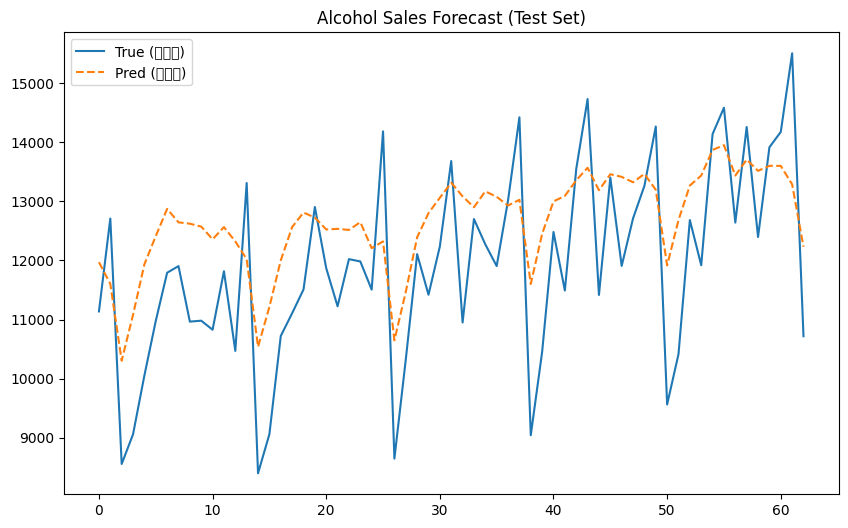

In [17]:
# 시각화
plt.figure(figsize=(10, 6)) # 그래프 창 크기 설정
plt.plot(y_test_orig, label='True (실제값)') # 실제값(y_test_orig)을 파란색 실선으로 그림
plt.plot(pred_orig, label='Pred (예측값)', linestyle='--') # 예측값(pred_orig)을 주황색 점선으로 그림
plt.legend()
plt.title('Alcohol Sales Forecast (Test Set)')
plt.show()